<a href="https://colab.research.google.com/github/tara618/symmetrical-octo-palm-tree/blob/main/Lab_ML_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
def weight_update(q, w, x = 1):
    return w + q * x

def calculate_new_weight(t, y, w, alpha, x=None):
    q = alpha * (t - y)
    temp = []
    if x == None:
        return w + q

    for i in range(len(w)):
        temp.append(weight_update(q, w[i], x[i]))
    return temp

def y_input(x, w, b):
    sum = 0
    for i in range(len(x)):
        sum = sum + x[i] * w[i]
    return sum + b

def step_function(y_in):
    if y_in >= 0:
        return 1
    else:
        return 0

def bi_polar_step_function(y_in):
    if y_in > 0:
        return 1
    elif y_in == 0:
        return 0
    else:
        return -1

def sigmoid_function(y_in):
    return 1/(1 + np.exp(-y_in))

def relu_function(y_in):
    if y_in > 0:
        return y_in
    else:
        return 0

def activation_function(y_in, acti_func):
    if acti_func == 'step':
        return step_function(y_in)
    elif acti_func == 'bpstep':
        return bi_polar_step_function(y_in)
    elif acti_func == 'sigmoid':
        return sigmoid_function(y_in)
    elif acti_func == 'relu':
        return relu_function(y_in)
    else:
        pass

def sum_square_error(y, y_bar):
    sum = 0
    for i in range(len(y_bar)):
        sum = sum + (y[i] - y_bar[i])**2
    return sum / len(y)

def perceptron(x, z, w, b, alpha, acti_func, error=0.002):
    data = {}
    error_list = []
    k = 0
    err = 1

    while err > error and k <= 1000:
        y_pred = []

        for i in range(len(x)):
            y_in = y_input(x[i], w, b)
            y = activation_function(y_in, acti_func)
            y_pred.append(y)

            if y != z[i]:
                w = calculate_new_weight(z[i], y, w, alpha, x[i])
                b = calculate_new_weight(z[i], y, b, alpha)

        err = sum_square_error(z, y_pred)
        error_list.append(err)
        k = k + 1

    data['epoch'] = k
    data['weights'] = w
    data['bias'] = b
    data['error_values'] = error_list
    return data

In [4]:
x = [[0, 0], [0, 1], [1, 0], [1, 1]]
z = [0, 0, 0, 1]
w = [0.2, -0.75]
b = 10
a = 0.05

data = perceptron(x, z, w, b, a, acti_func='step')
print("Number of epochs: ", data['epoch'])
print("Final weights: ", data['weights'])

Number of epochs:  130
Final weights:  [0.1000000000000001, 0.05000000000000032]


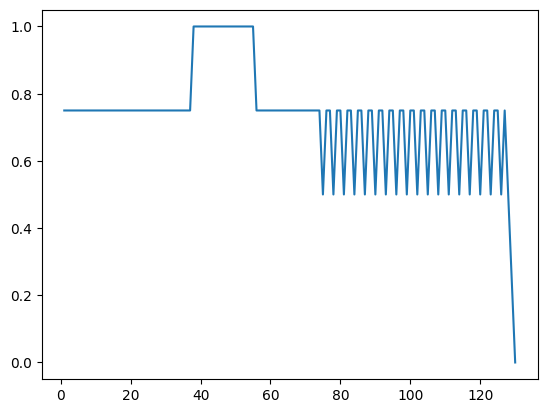

In [5]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1, data['epoch'] + 1)], data['error_values'])

<BarContainer object of 4 artists>

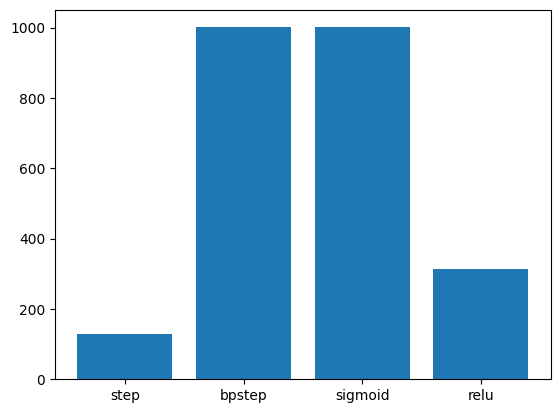

In [6]:
epoch_list = []
lst = ['step', 'bpstep', 'sigmoid', 'relu']
for i in lst:
    data = perceptron(x, z, w, b, a, acti_func=i)
    epoch_list.append(data['epoch'])

plt.bar(lst, epoch_list)

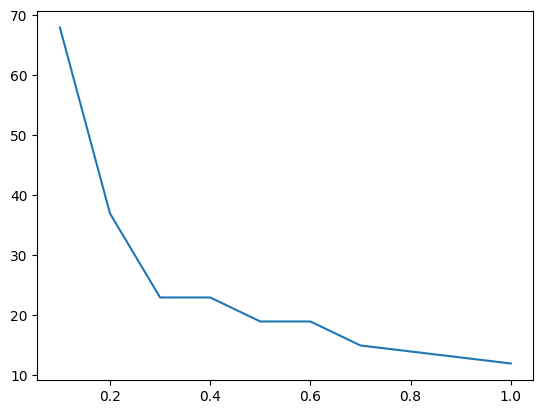

In [7]:
rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

x = [[0, 0], [0, 1], [1, 0], [1, 1]]
z = [0, 0, 0, 1]
w = [0.2, -0.75]
b = 10

iters = []

for i in rates:
    data = perceptron(x, z, w, b, i, acti_func='step')
    iters.append(data['epoch'])

plt.plot(rates, iters)

In [8]:
x = [[0, 0], [0, 1], [1, 0], [1, 1]]
z = [0, 1, 1, 0]
w = [0.2, -0.75]
b = 10
a = 0.05

data = perceptron(x, z, w, b, a, acti_func='step')
print("Number of epochs: ", data['epoch'])
print("Final weights: ", data['weights'])

Number of epochs:  1001
Final weights:  [-0.09999999999999969, -0.09999999999999969]


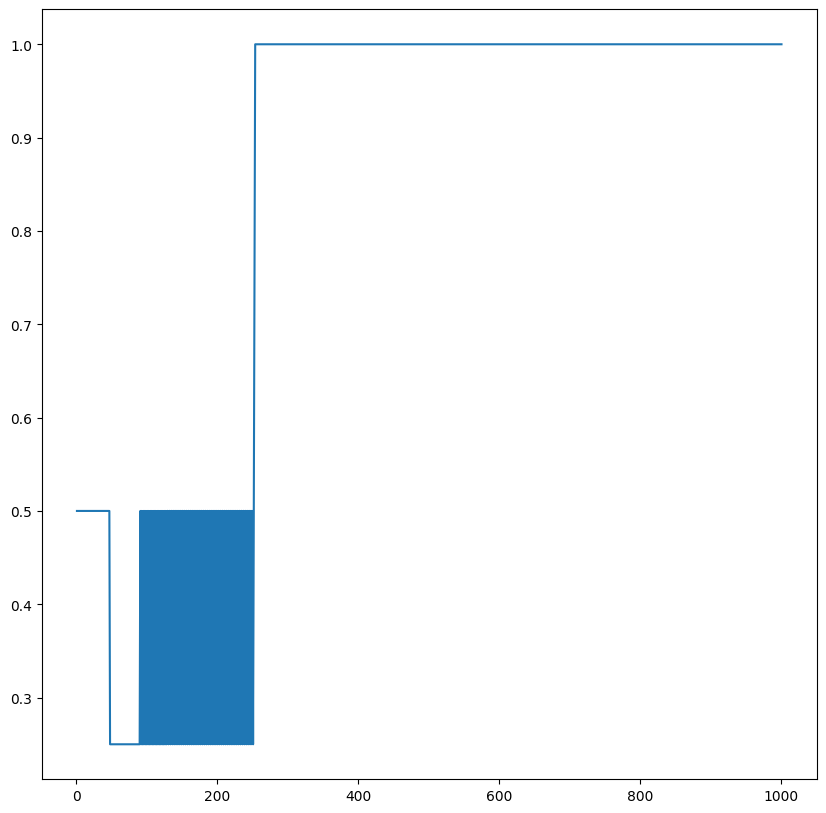

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot([i for i in range(1, data['epoch'] + 1)], data['error_values'])

<BarContainer object of 4 artists>

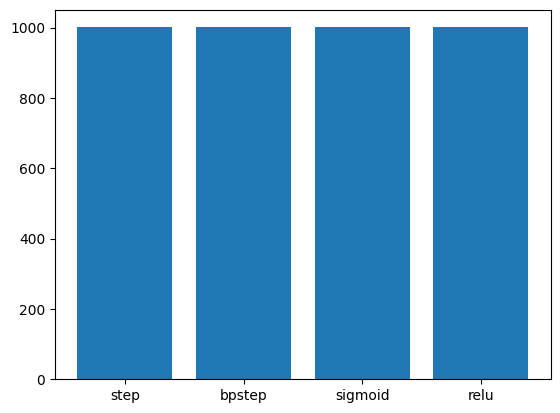

In [10]:
epoch_list = []
lst = ['step', 'bpstep', 'sigmoid', 'relu']
for i in lst:
    data = perceptron(x, z, w, b, a, acti_func=i)
    epoch_list.append(data['epoch'])

plt.bar(lst, epoch_list)

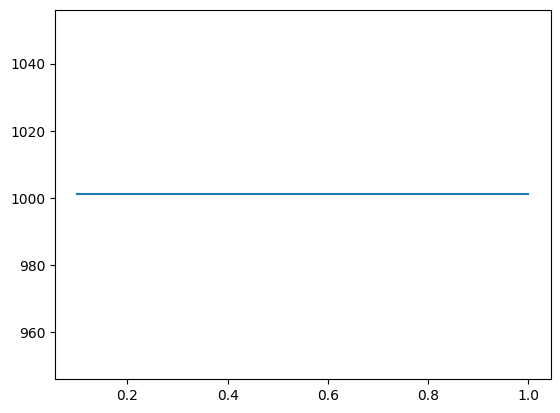

In [11]:
rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

x = [[0, 0], [0, 1], [1, 0], [1, 1]]
z = [0, 1, 1, 0]
w = [0.2, -0.75]
b = 10

iters = []

for i in rates:
    data = perceptron(x, z, w, b, i, acti_func='step')
    iters.append(data['epoch'])

plt.plot(rates, iters)

In [13]:
df = pd.read_excel("mlab.xlsx")
df = df.iloc[:, :5]
df['High Value Tx?'] = ['Yes'] * 3 + ['No', 'Yes'] * 2 + ['Yes'] + ['No'] *2

In [ ]:
def mod_perceptron(x, z, w, b, alpha, acti_func, error=0.002):

    data = {}
    error_list = []

    k = 0
    err = 1

    while err > error and k <= 1000:
        y_pred = []

        for i in range(x.shape[0]):
            y_in = y_input(x.iloc[i].tolist(), w, b)
            y = activation_function(y_in, acti_func)
            y_pred.append(y)
            if y != z[i]:
                w = calculate_new_weight(z[i], y, w, alpha, x.iloc[i].tolist())
                b = calculate_new_weight(z[i], y, b, alpha)

        err = sum_square_error(z, y_pred)
        error_list.append(err)
        k = k + 1

    data['epoch'] = k
    data['weights'] = w
    data['bias'] = b
    data['error_values'] = error_list
    return data

x = df.iloc[:, 1:4]
z = df['Payment (Rs)'].tolist()
w = [0.000002, 0.000003, -0.000001]
b = 0.000006
a = 1

data = mod_perceptron(x, z, w, b, a, acti_func = 'sigmoid')
print("Weights are: ", data['weights'])

In [ ]:
matrix_A = df.iloc[:, 1:4].to_numpy()
matrix_b = df['Payment (Rs)'].to_numpy()

pinv_A = np.linalg.pinv(matrix_A)
result = pinv_A @ matrix_b

In [22]:
def neural_network(l):
    return None

In [23]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

input_neurons = 2
hidden_neurons = 2
output_neurons = 1

hidden_weights = 2 * np.random.rand(input_neurons, hidden_neurons) - 1
output_weights = 2 * np.random.rand(hidden_neurons, output_neurons) - 1

hidden_bias = np.random.rand(1, hidden_neurons)
output_bias = np.random.rand(1, output_neurons)

alpha = 0.05

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

epochs = 1000
convergence_error = 0.002

for epoch in range(epochs):
    hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
    output_layer_output = sigmoid(output_layer_input)

    error = y - output_layer_output
    loss = 0.5 * np.mean(error ** 2)

    output_delta = error * sigmoid_derivative(output_layer_output)
    hidden_layer_error = output_delta.dot(output_weights.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

    output_weights += alpha * hidden_layer_output.T.dot(output_delta)
    output_bias += alpha * np.sum(output_delta, axis=0, keepdims=True)
    hidden_weights += alpha * X.T.dot(hidden_layer_delta)
    hidden_bias += alpha * np.sum(hidden_layer_delta, axis=0, keepdims=True)

    if loss <= convergence_error:
        print(f"Converged after {epoch + 1} epochs with loss: {loss}")
        break

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}, HiddenWeights: {hidden_weights}, OutputWeights: {output_weights}\n")

test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict_outputs(test_inputs, hidden_weights, hidden_bias, output_weights, output_bias):
    hidden_layer_output = sigmoid(np.dot(test_inputs, hidden_weights) + hidden_bias)
    final_output = sigmoid(np.dot(hidden_layer_output, output_weights) + output_bias)
    predicted_outputs = np.round(final_output)

    return predicted_outputs

predicted_outputs = np.round(predict_outputs(test_inputs, hidden_weights, hidden_bias, output_weights, output_bias))

print("Predicted Outputs:")
for i in range(len(test_inputs)):
    print(f"{test_inputs[i]} -> {predicted_outputs[i][0]}")

Epoch 0, Loss: 0.1849943117024214, HiddenWeights: [[ 0.88092848  0.42534751]
 [-0.01562009  0.78937175]], OutputWeights: [[ 0.39919715]
 [-0.52167154]]

Epoch 100, Loss: 0.0990589549463387, HiddenWeights: [[ 0.87825046  0.43389306]
 [-0.02161758  0.78307898]], OutputWeights: [[-0.1009624 ]
 [-1.04307764]]

Epoch 200, Loss: 0.09779077975348723, HiddenWeights: [[ 0.87155893  0.41326485]
 [-0.02586998  0.75245514]], OutputWeights: [[-0.12302695]
 [-1.0698825 ]]

Epoch 300, Loss: 0.0973398107738497, HiddenWeights: [[ 0.86506502  0.38945168]
 [-0.03026757  0.71990346]], OutputWeights: [[-0.09976332]
 [-1.05208673]]

Epoch 400, Loss: 0.09695178087822338, HiddenWeights: [[ 0.86016543  0.36487461]
 [-0.03363298  0.68708566]], OutputWeights: [[-0.06792751]
 [-1.02849868]]

Epoch 500, Loss: 0.09659406376220651, HiddenWeights: [[ 0.8571719   0.33984092]
 [-0.03569978  0.65412548]], OutputWeights: [[-0.03399514]
 [-1.00600725]]

Epoch 600, Loss: 0.09625889342050896, HiddenWeights: [[ 0.8561861   0

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

input_neurons = 2
hidden_neurons = 2
output_neurons = 1
hidden_weights = 2 * np.random.rand(input_neurons, hidden_neurons) - 1
output_weights = 2 * np.random.rand(hidden_neurons, output_neurons) - 1

hidden_bias = np.random.rand(1, hidden_neurons)
output_bias = np.random.rand(1, output_neurons)

alpha = 0.1

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

epochs = 10000
convergence_error = 0.002

for epoch in range(epochs):
    hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
    output_layer_output = sigmoid(output_layer_input)

    error = y - output_layer_output
    loss = 0.5 * np.mean(error ** 2)

    output_delta = error * sigmoid_derivative(output_layer_output)
    hidden_layer_error = output_delta.dot(output_weights.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

    output_weights += alpha * hidden_layer_output.T.dot(output_delta)
    output_bias += alpha * np.sum(output_delta, axis=0, keepdims=True)
    hidden_weights += alpha * X.T.dot(hidden_layer_delta)
    hidden_bias += alpha * np.sum(hidden_layer_delta, axis=0, keepdims=True)

    if loss <= convergence_error:
        print(f"Converged after {epoch + 1} epochs with loss: {loss}")
        break

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

def predict_outputs(test_inputs, hidden_weights, hidden_bias, output_weights, output_bias):
    hidden_layer_output = sigmoid(np.dot(test_inputs, hidden_weights) + hidden_bias)
    final_output = sigmoid(np.dot(hidden_layer_output, output_weights) + output_bias)
    predicted_outputs = np.round(final_output)

    return predicted_outputs

predicted_outputs = np.round(predict_outputs(test_inputs, hidden_weights, hidden_bias, output_weights, output_bias))

print("Predicted Outputs for XOR Gate:")
for i in range(len(test_inputs)):
    print(f"{test_inputs[i]} -> {predicted_outputs[i][0]}")

Epoch 0, Loss: 0.14188339695923247
Epoch 1000, Loss: 0.1250192302590049
Epoch 2000, Loss: 0.12499791089549225
Epoch 3000, Loss: 0.12498259162003203
Epoch 4000, Loss: 0.12493977678549181
Epoch 5000, Loss: 0.12474473769698631
Epoch 6000, Loss: 0.12344527391610835
Epoch 7000, Loss: 0.11315972309314107
Epoch 8000, Loss: 0.08491138528537862
Epoch 9000, Loss: 0.07215886819952208
Predicted Outputs for XOR Gate:
[0 0] -> 0.0
[0 1] -> 1.0
[1 0] -> 0.0
[1 1] -> 1.0
